In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as po
import plotly.offline as py 
from sklearn import tree
#from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.figure_factory as ff

In [5]:
df = pd.read_csv('samvikas_data.csv')

In [70]:
df

,Name,Months,Height,Gender,Contact,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Location,Remarks
0,A,3,4,M,988885565,1,NaN,NaN,NaN,NaN,NaN,AP,NaN
1,B,4,2,M,988885565,1,1.0,NaN,NaN,NaN,NaN,Gujarath,NaN
2,C,5,2,F,988885565,1,NaN,NaN,NaN,NaN,NaN,AP,NaN
3,D,6,3,F,988885565,1,1.0,1.0,NaN,NaN,NaN,Telangana,NaN
4,E,7,3,F,988885565,1,1.0,NaN,NaN,NaN,NaN,Orrisa,NaN
5,F,3,4,M,988885565,1,NaN,NaN,NaN,NaN,NaN,Bihar,NaN
6,G,5,5,M,988885565,1,1.0,1.0,NaN,NaN,NaN,Maharastra,NaN
7,H,6,2,M,988885565,1,1.0,NaN,NaN,NaN,NaN,West Bengal,NaN
8,I,12,1,F,988885565,1,1.0,1.0,1.0,NaN,NaN,Bihar,NaN
9,J,15,5,M,988885565,1,1.0,1.0,1.0,NaN,NaN,SD,NaN


In [6]:
print(df.head())

  Name  Months  Height Gender  ...  Feature 5  Feature 6   Location  Remarks
0    A       3       4      M  ...        NaN        NaN         AP      NaN
1    B       4       2     M   ...        NaN        NaN   Gujarath      NaN
2    C       5       2      F  ...        NaN        NaN         AP      NaN
3    D       6       3      F  ...        NaN        NaN  Telangana      NaN
4    E       7       3      F  ...        NaN        NaN     Orrisa      NaN

[5 rows x 13 columns]


In [7]:
df.shape

(21, 13)

In [8]:
df = df.drop(df.index[1])

In [39]:
df1 = df[df.columns.drop(['Height'])]

In [40]:
df2 = df1.fillna(0)
df2
df2['Gender'].astype(str)

0     M
2     F
3     F
4     F
5     M
6     M
7     M
8     F
9     M
10    M
11    F
12    F
13    M
14    F
15    M
16    F
17    F
18    M
19    F
20    M
Name: Gender, dtype: object

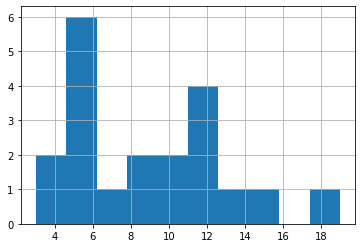

In [41]:
#visualization 
df2['Months'].hist()

In [42]:
#visualization 

df2.loc[df['Gender'] == 'M', 'Gender'] = 1
df2.loc[df['Gender'] == 'F', 'Gender'] = 0
df2

,Name,Months,Gender,Contact,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Location,Remarks
0,A,3,1,988885565,1,0.0,0.0,0.0,0.0,0.0,AP,0.0
2,C,5,0,988885565,1,0.0,0.0,0.0,0.0,0.0,AP,0.0
3,D,6,0,988885565,1,1.0,1.0,0.0,0.0,0.0,Telangana,0.0
4,E,7,0,988885565,1,1.0,0.0,0.0,0.0,0.0,Orrisa,0.0
5,F,3,1,988885565,1,0.0,0.0,0.0,0.0,0.0,Bihar,0.0
6,G,5,1,988885565,1,1.0,1.0,0.0,0.0,0.0,Maharastra,0.0
7,H,6,1,988885565,1,1.0,0.0,0.0,0.0,0.0,West Bengal,0.0
8,I,12,0,988885565,1,1.0,1.0,1.0,0.0,0.0,Bihar,0.0
9,J,15,1,988885565,1,1.0,1.0,1.0,0.0,0.0,SD,0.0
10,K,8,1,988885565,1,1.0,1.0,0.0,0.0,0.0,Tamil nadu,0.0


In [43]:
df2.dtypes

Name          object
Months         int64
Gender        object
Contact        int64
Feature 1      int64
Feature 2    float64
Feature 3    float64
Feature 4    float64
Feature 5    float64
Feature 6    float64
Location      object
Remarks      float64
dtype: object

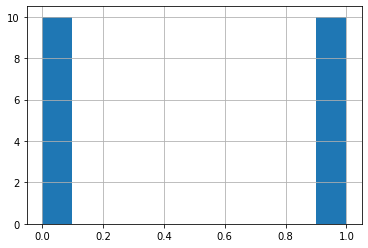

In [44]:
#visualization 
df2['Gender'].hist()

In [46]:
df2['Remarks'] = (df2['Feature 1'] + df2['Feature 2']+ df2['Feature 3'] + df2['Feature 4']+ df2['Feature 5'] + df2['Feature 6'])

In [47]:
for index, row in df2.iterrows():
  print(row['Remarks'])
  

1.0
1.0
3.0
2.0
1.0
3.0
2.0
4.0
4.0
3.0
2.0
4.0
3.0
4.0
3.0
2.0
4.0
2.0
3.0
6.0


In [48]:
df2

,Name,Months,Gender,Contact,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Location,Remarks
0,A,3,1,988885565,1,0.0,0.0,0.0,0.0,0.0,AP,1.0
2,C,5,0,988885565,1,0.0,0.0,0.0,0.0,0.0,AP,1.0
3,D,6,0,988885565,1,1.0,1.0,0.0,0.0,0.0,Telangana,3.0
4,E,7,0,988885565,1,1.0,0.0,0.0,0.0,0.0,Orrisa,2.0
5,F,3,1,988885565,1,0.0,0.0,0.0,0.0,0.0,Bihar,1.0
6,G,5,1,988885565,1,1.0,1.0,0.0,0.0,0.0,Maharastra,3.0
7,H,6,1,988885565,1,1.0,0.0,0.0,0.0,0.0,West Bengal,2.0
8,I,12,0,988885565,1,1.0,1.0,1.0,0.0,0.0,Bihar,4.0
9,J,15,1,988885565,1,1.0,1.0,1.0,0.0,0.0,SD,4.0
10,K,8,1,988885565,1,1.0,1.0,0.0,0.0,0.0,Tamil nadu,3.0


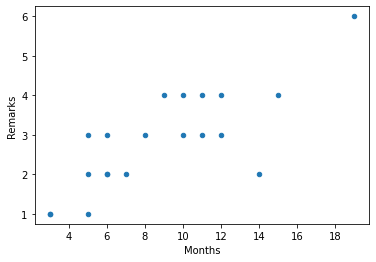

In [49]:
ax1 = df2.plot.scatter(x ='Months',y ='Remarks')
ax1

In [75]:
from bokeh.io import output_file
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
output_notebook()
# My x-y coordinate data

source = ColumnDataSource(data=dict(
x = list(df2['Months']),
y = list(df2['Remarks']),
name = list(df2['Name']),
))
print(name)
tooltips = [
           ("name","@name"),
            ("(x,y)", "($x, $y)"),     
           ]


# Output the visualization directly in the notebook
output_file('first_glyphs.html', title='First Glyphs')

# Create a figure with no toolbar and axis ranges of [0,3]
fig = figure(title='SamVikas',
             plot_height=300, plot_width=300,
             x_range=(2, 20), y_range=(0, 8),
             toolbar_location=None,tooltips=tooltips)

# Draw the coordinates as circles
fig.circle('x','y', color='green', size=10, alpha=0.5,source=source )



['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U']


GlyphRenderer(id='5782', ...)

In [76]:
# Show plot

fig.add_tools(HoverTool(tooltips=tooltips))

show(fig)
# Add the HoverTool to the figure
